In [110]:
%matplotlib inline
import networkx as nx
import math
import random

In [111]:


# dataset
X = [[0, 0],
     [0, 1],
     [1, 0], 
     [1, 1]]
y = [0, 1, 1, 0]

class Node:

    def __init__(self, name, activator, G):
        self.name = name
        self.activator = activator
        self.weights = None
        self.value = 0
        self.gradients = []
        self.grad = 0
        pass

    def forward(self, parents):
        if self.weights is None:
            self.weights = [random.random() for _ in range(len(parents))]
            self.gradients = [0 for _ in range(len(parents))]
        
        before_activation = sum([self.weights[i] * parents[i].value 
                                 for i in range(len(parents))])
        self.value = self.activator(before_activation)
    
    def backward(self, parents):
        print("Backward", self.name, "with", parents)
        # Sum over the grad for the 
        sum_of_incoming_grad = sum([parent.grad for parent in parents])
        for i in range(len(self.weights)):
            self.gradients[i] = sum_of_incoming_grad * self.activator.gradient(self.weights[i])

        print("Computed", self.gradients)
        self.grad = sum(self.gradients)
        
    
    def __str__(self):
        return self.name
    
    def __repr__(self):
        return "{}={}".format(self.name, self.value)
    
    def __hash__(self):
        return hash(self.name)
    
    def __eq__(self, other):
        return self.name == other.name

class Activation:
    
    pass

class Sigmoid(Activation):
    def __call__(self, value):
        return 1 / (1 + math.exp(-value))
    
    def gradient(self, weight):
        return self(weight) * (1 - self(weight))
    

class Identity(Activation):
    def __call__(self, value):
        return value
    
    def gradient(self, weight):
        return 1.0

Create the architecture

In [112]:
G = nx.DiGraph()

# Input nodes
d_input = len(X[0])

input_nodes = []
for i in range(d_input):
    input_node = Node("x" + str(i), Identity(), G)
    input_nodes.append(input_node)
    G.add_node(input_node)

# Intermediate layer
for i in range(3):
    hidden_node = Node("h" + str(i), Sigmoid(), G)
    for input_node in input_nodes:
        G.add_edge(input_node, hidden_node)

# Final layer
output_node = Node("y", Sigmoid(), G)
for n in G.nodes():
    if n.name.startswith("h"):
        G.add_edge(n, output_node)


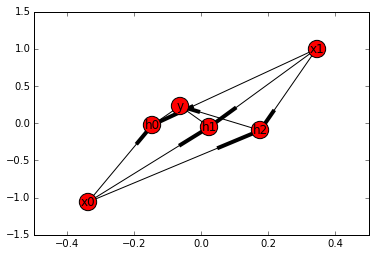

In [113]:
nx.draw_networkx(G)

In [114]:

for x in X:
    # Initialize values of the input nodes and do the forward computation
    for i, input_node in enumerate(input_nodes):
        input_node.value = x[i]
        
    for n in nx.topological_sort(G):
        if n not in input_nodes:
            preds = G.predecessors(n)
            #print(type(preds), preds)
            n.forward(preds)
        
    print(output_node.value)
    
    # Backward pass
    G_rev = nx.reverse(G)
    for n in nx.topological_sort(G_rev):
        if n not in input_nodes:
            preds = G_rev.predecessors(n)
            #print(type(preds), preds)
            n.backward(preds)

            
    
    
    
    



0.6519148568572986
Backward y with []
Computed [0.0, 0.0, 0.0]
Backward h2 with [y=0.6519148568572986]
Computed [0.0, 0.0]
Backward h1 with [y=0.6519148568572986]
Computed [0.0, 0.0]
Backward h0 with [y=0.6519148568572986]
Computed [0.0, 0.0]
0.7014670519433183
Backward y with []
Computed [0.0, 0.0, 0.0]
Backward h2 with [y=0.7014670519433183]
Computed [0.0, 0.0]
Backward h1 with [y=0.7014670519433183]
Computed [0.0, 0.0]
Backward h0 with [y=0.7014670519433183]
Computed [0.0, 0.0]
0.6721589800447337
Backward y with []
Computed [0.0, 0.0, 0.0]
Backward h2 with [y=0.6721589800447337]
Computed [0.0, 0.0]
Backward h1 with [y=0.6721589800447337]
Computed [0.0, 0.0]
Backward h0 with [y=0.6721589800447337]
Computed [0.0, 0.0]
0.716938472606766
Backward y with []
Computed [0.0, 0.0, 0.0]
Backward h2 with [y=0.716938472606766]
Computed [0.0, 0.0]
Backward h1 with [y=0.716938472606766]
Computed [0.0, 0.0]
Backward h0 with [y=0.716938472606766]
Computed [0.0, 0.0]


In [115]:
import random